This project is developed to predict tomorrow's S&P 500 index price using historical data. First start by downloading S&P 500 prices using a package called yfinance.  Then, clean up the data with pandas, and get it ready for machine learning.  

In [1]:
import pandas as pd
import yfinance as yf # importing this to download daily stock index prices
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

 Using Ticker class for downloading the price history for each symbol.

 The S&P 500 index, or Standard & Poor's 500, is a very important index that tracks the performance of the stocks of 500 large-cap companies in the U.S. The ticker symbol for the S&P 500 index is ^GSPC.

In [2]:
sp_500 = yf.Ticker("^GSPC")  # using GSPC (sp_500 index)

In [3]:
sp_500 = sp_500.history(period="max") # retriving all the data from beginning

In [ ]:
sp_500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-01 00:00:00-04:00,4530.600098,4541.250000,4501.350098,4515.770020,3246260000,0.0,0.0
2023-09-05 00:00:00-04:00,4510.060059,4514.290039,4496.009766,4496.830078,3526250000,0.0,0.0
2023-09-06 00:00:00-04:00,4490.350098,4490.350098,4442.379883,4465.479980,3418850000,0.0,0.0


In [4]:
sp_500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-08-30 00:00:00-04:00', '2023-08-31 00:00:00-04:00',
               '2023-09-01 00:00:00-04:00', '2023-09-05 00:00:00-04:00',
               '2023-09-06 00:00:00-04:00', '2023-09-07 00:00:00-04:00',
               '2023-09-08 00:00:00-04:00', '2023-09-11 00:00:00-04:00',
               '2023-09-12 00:00:00-04:00', '2023-09-13 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24040, freq=None)

Cleaning dataset

<Axes: xlabel='Date'>

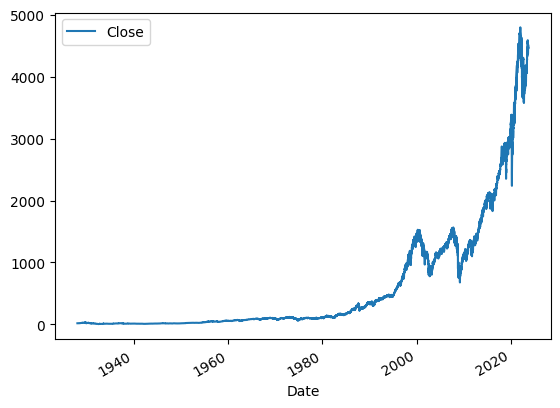

In [5]:
sp_500.plot.line(y="Close", use_index=True) # Visualizing the line graph with closing price at y-axis

In [6]:
# deleting these two columns
del sp_500["Dividends"]
del sp_500["Stock Splits"]

In [7]:
sp_500["Tomorrow"] = sp_500["Close"].shift(-1)

In [8]:
sp_500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-09-07 00:00:00-04:00,4434.549805,4457.810059,4430.459961,4451.140137,3763760000,4457.490234
2023-09-08 00:00:00-04:00,4451.299805,4473.529785,4448.379883,4457.490234,3259290000,4487.459961
2023-09-11 00:00:00-04:00,4480.979980,4490.770020,4467.890137,4487.459961,3369920000,4461.899902


Checking if the tomorrow price is greater than closing price then create a column target and assign the true or false value but 1 for true and 0 for false. as using astype() function

In [9]:
sp_500["Target"] = (sp_500["Tomorrow"] > sp_500["Close"]).astype(int)

In [ ]:
sp_500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-09-01 00:00:00-04:00,4530.600098,4541.250000,4501.350098,4515.770020,3246260000,4496.830078,0
2023-09-05 00:00:00-04:00,4510.060059,4514.290039,4496.009766,4496.830078,3526250000,4465.479980,0
2023-09-06 00:00:00-04:00,4490.350098,4490.350098,4442.379883,4465.479980,3418850000,4451.140137,0


In [10]:
sp_500 = sp_500.loc["1990-01-01":].copy() #reducing the data after specific date

In [ ]:
sp_500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-09-01 00:00:00-04:00,4530.600098,4541.250000,4501.350098,4515.770020,3246260000,4496.830078,0
2023-09-05 00:00:00-04:00,4510.060059,4514.290039,4496.009766,4496.830078,3526250000,4465.479980,0
2023-09-06 00:00:00-04:00,4490.350098,4490.350098,4442.379883,4465.479980,3418850000,4451.140137,0


* n_estimators means the number of decision trees training, the higher the value of n_estimators mostly result in the best accuracy of the model.
* min_sample_split helps to prevent overfitting.

In [11]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [12]:
# time series dataset, so cant use the other splitting methods.
# assign row to the training set and excluded last 100 rows and
# assigned these last 100 rows to test set

train = sp_500.iloc[:-100]
test = sp_500.iloc[-100:]

In [13]:
predictors = ["Close", "Volume", "Open", "High", "Low"]

In [14]:
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
preds = model.predict(test[predictors])

In [16]:
preds = pd.Series(preds, index=test.index)

In [17]:
preds

Date
2023-04-21 00:00:00-04:00    1
2023-04-24 00:00:00-04:00    0
2023-04-25 00:00:00-04:00    1
2023-04-26 00:00:00-04:00    1
2023-04-27 00:00:00-04:00    0
                            ..
2023-09-07 00:00:00-04:00    1
2023-09-08 00:00:00-04:00    0
2023-09-11 00:00:00-04:00    0
2023-09-12 00:00:00-04:00    1
2023-09-13 00:00:00-04:00    1
Length: 100, dtype: int64

In [18]:
precision_score(test["Target"], preds)

0.5507246376811594

In [19]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

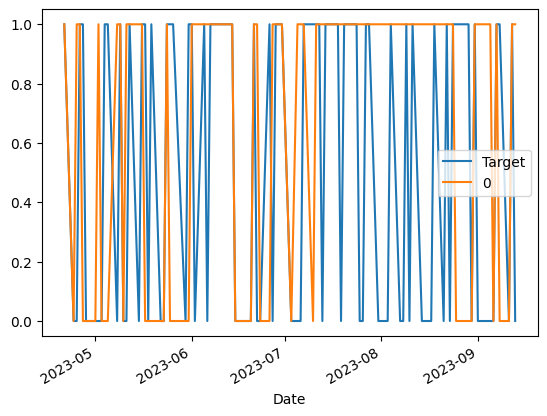

In [20]:
combined.plot()

In [24]:
#predicting function

def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [25]:
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)


In [26]:
predictions = backtest(sp_500, model, predictors)

In [27]:
predictions["Predictions"].value_counts()

0    3435
1    2555
Name: Predictions, dtype: int64

In [28]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5287671232876713

In [29]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.533723
0    0.466277
Name: Target, dtype: float64

Including other predictors to increase the accuracy

In [30]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = sp_500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  sp_500[ratio_column] = sp_500["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  sp_500[trend_column] = sp_500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [31]:
sp_500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-07 00:00:00-04:00,4434.549805,4457.810059,4430.459961,4451.140137,3763760000,4457.490234,1,0.998392,0.0,0.991925,1.0,0.998004,30.0,1.087617,120.0,1.152163,530.0
2023-09-08 00:00:00-04:00,4451.299805,4473.529785,4448.379883,4457.490234,3259290000,4487.459961,1,1.000713,1.0,0.995566,2.0,0.999097,30.0,1.088754,120.0,1.153374,530.0
2023-09-11 00:00:00-04:00,4480.979980,4490.770020,4467.890137,4487.459961,3369920000,4461.899902,0,1.003350,2.0,1.003529,2.0,1.005383,30.0,1.095670,120.0,1.160684,530.0


In [39]:
#Droping missing values

sp_500 = sp_500.dropna()

In [40]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [41]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [42]:
predictions = backtest(sp_500, model, new_predictors)

In [43]:
predictions["Predictions"].value_counts()

0.0    4167
1.0     822
Name: Predictions, dtype: int64

In [44]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5693430656934306